## Py-DDA example notebook

This notebooks shows how you can get multiple Doppler winds from different radars. All that is needed are Cf-Compliant grids that share the same grid specifications. Tools such as Python ARM Radar Toolkit (Py-ART) (https://github.com/ARM-DOE/pyart) and LROSE (https://www.eol.ucar.edu/content/lidar-radar-open-software-environment) can create these grids for you. 

The PyDDA package is built on top of Py-ART. Therefore, Py-ART is needed for PyDDA to run. 

In [1]:
import pyart
import pydda
%pylab inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Populating the interactive namespace from numpy and matplotlib


First, we load our Cf-Compliant grids using Py-ART's read_grid function.

In [2]:
berr_grid = pyart.io.read_grid("berr_Darwin_hires.nc")
cpol_grid = pyart.io.read_grid("cpol_Darwin_hires.nc")
print(cpol_grid.fields.keys())

dict_keys(['VT', 'AZ', 'ROI', 'EL', 'DT'])


Next, we must specify the initial conditions. PyDDA currently has two options for the intial state:

    * pydda.retrieval.make_wind_field_from_profile - Make the intialization wind field be that from a sounding    
    * pydda.retrieval.make_constant_wind_field - Specify a constant wind field 
    
More options will be added in the future! In this example, we will load data from a sounding and use that as our intial state with no vertical motion. 
    

In [3]:
sounding = pyart.io.read_arm_sonde(
    "/home/rjackson/data/soundings/twpsondewnpnC3.b1.20060119.231600.custom.cdf")
u_init, v_init, w_init = pydda.retrieval.make_wind_field_from_profile(
        cpol_grid, sounding, vel_field='VT')

Next, we will retrieve the wind field! The output of these is a list of Py-ART Grids which correspond to the inputs with the wind fields added in. 

In [4]:
Grids = pydda.retrieval.get_dd_wind_field([berr_grid, cpol_grid], u_init,
                                          v_init, w_init, Co=100.0, Cm=1500.0, 
                                          Cz=0, vel_name='VT', refl_field='DT',
                                          frz=5000.0, filt_iterations=0, 
                                          mask_outside_opt=True, upper_bc=1)

/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/cost_functions/cost_functions.py:559: RuntimeWarning: overflow encountered in power
  fallspeed = A*np.power(10, refl*B)*np.power(1.2/rho, 0.4)
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/cost_functions/cost_functions.py:559: RuntimeWarning: overflow encountered in power
  fallspeed = A*np.power(10, refl*B)*np.power(1.2/rho, 0.4)
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/angles.py:24: RuntimeWarning: invalid value encountered in true_divide
  elev = np.arccos((Re**2 + slantrsq - rh**2)/(2 * Re * slantr))
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/angles.py:24: RuntimeWarning: invalid value encountered in arccos
  elev = np.arccos((Re**2 + slantrsq - rh**2)/(2 * Re * slantr))
/home/rjackson/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.ab

Calculating weights for radars 0 and 1
Starting solver 
rmsVR = 40.2994366413
Total points:172054.0
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|    16.79|   126.17|     0.00|     0.00|     8.08
Norm of gradient: 0.0320252073946
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|     1.75|    43.27|     0.00|     0.00|     8.72
Norm of gradient: 0.00980930367243
Iterations before filter: 20
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|     3.40|    25.66|     0.00|     0.00|    14.97
Norm of gradient: 0.0195778185393
Iterations before filter: 30
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|     1.03|    23.32|     0.00|     0.00|    17.22
Norm of gradient: 0.0139508405501
Iterations before filter: 40
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|     0.43|    23.54|     0.00|     0.00|    17.79
Norm of gradient: 0.0142754297478
Iterations before filter: 50
| Jvel    | Jmass   | Jsmooth | Jbg     | Max w  
|     0.43|    23.54|     0.0

Finally, we will visualize the wind field. This is easy with the visualization module of PyDDA! PyDDA currently has support to plot wind barb plots through xy, xz, and yz cross sections. More types of plots (streamline plots, plots on geospatial grids) are planned as future features.

/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.py:406: RuntimeWarning: invalid value encountered in true_divide
  theta_1 = np.arccos(x/a)
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.py:407: RuntimeWarning: invalid value encountered in arccos
  theta_2 = np.arccos((x-rad2[1])/b)
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.py:408: RuntimeWarning: invalid value encountered in true_divide
  return np.arccos((a*a+b*b-c*c)/(2*a*b))
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.py:408: RuntimeWarning: invalid value encountered in arccos
  return np.arccos((a*a+b*b-c*c)/(2*a*b))
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.py:407: RuntimeWarning: divide by zero encountered in true_divide
  theta_2 = np.arccos((x-rad2[1])/b)
/home/rjackson/anaconda3/lib/python3.5/site-packages/pydda/retrieval/wind_retrieve.p

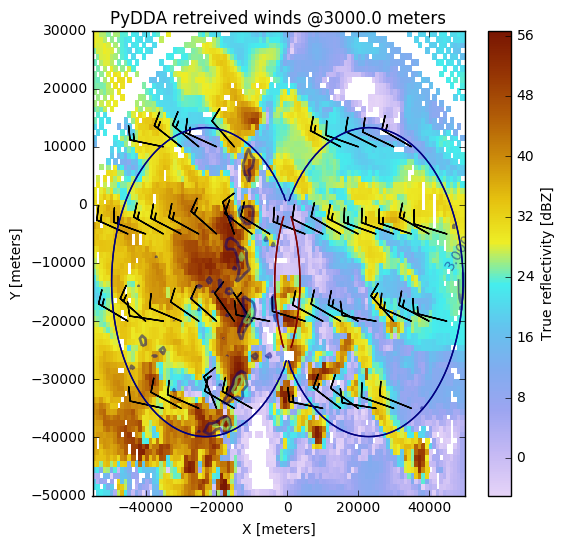

In [5]:
plt.figure(figsize=(6,6))
pydda.vis.plot_horiz_xsection_barbs(Grids, 'DT', level=6,
                                    vel_contours=[3, 6, 9],
                                    barb_spacing_x_km=5.0,
                                    barb_spacing_y_km=15.0)


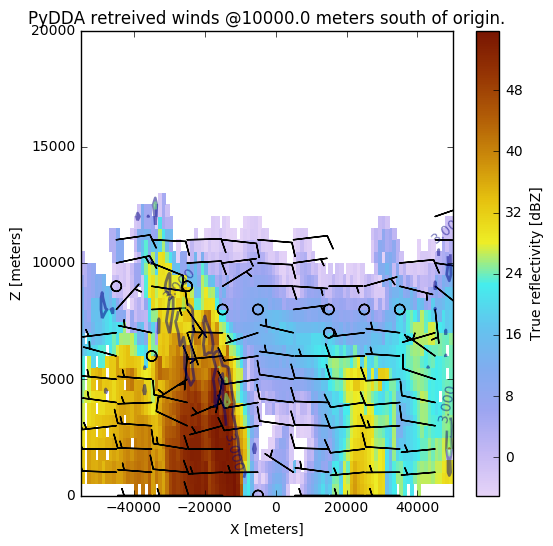

In [6]:
plt.figure(figsize=(6,6))
pydda.vis.plot_xz_xsection_barbs(Grids, 'DT', level=40,
                                 vel_contours=[3, 6, 9],
                                 barb_spacing_x_km=10.0,
                                 barb_spacing_z_km=2.0)

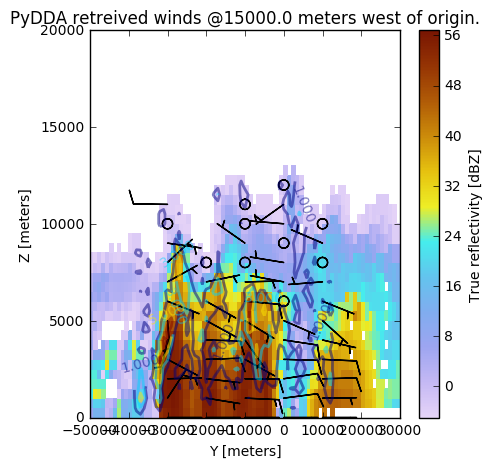

In [7]:
plt.figure(figsize=(5,5))
pydda.vis.plot_yz_xsection_barbs(Grids, 'DT', level=40,
                                 vel_contours=[1, 3, 5, 7],
                                 barb_spacing_x_km=10.0,
                                 barb_spacing_z_km=2.0)